## Exercise 7
# SVM and Naive Bayes

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm,datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('./Iris.csv')
df = df.drop('Id',axis=1)

In [8]:
print(df.Species.dtype)

object


In [10]:
from sklearn import preprocessing

if df.Species.dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df.Species.values))
    df.Species = lbl.transform(list(df.Species.values))
    
print(df.Species.dtype)


int32


In [11]:
from sklearn.model_selection import train_test_split

Y = df.Species.values
X = df.drop(['Species'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state=27)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(x_train, y_train)
y_pred = NaiveBayesModel.predict(x_test)
accuracy_score(y_test, y_pred)

0.9

In [13]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[ 7  0  0]
 [ 0 10  1]
 [ 0  2 10]]


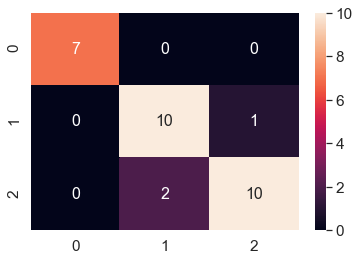

In [15]:
import seaborn as sn

sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(con_mat), annot=True,annot_kws={"size": 16})

### Step 5: Fit the data into SVM classifier

In [16]:
from sklearn import svm

from sklearn.metrics import average_precision_score

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.95)

classifier = svm.LinearSVC(random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


Since the precision-recall score is 100%, we will try adding noise data and build the SVM model.

In [17]:
import numpy as np
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.20)

#### 1) Using Linear kernel

Average precision-recall score: 0.7714285714285714


Text(0, 0.5, 'Precision')

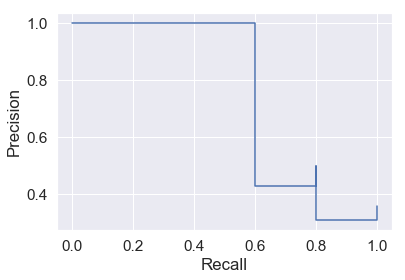

In [18]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel='linear', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

#### 2) Using Polynomial kernel

Average precision-recall score: 0.75


c:\users\praka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, 'Precision')

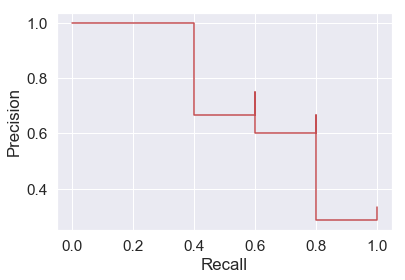

In [23]:
classifier = svm.SVC(kernel='poly', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')

#### 3) Using RBF (Radial Basis Function) Kernel

Average precision-recall score: 0.7857142857142856


c:\users\praka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, 'Precision')

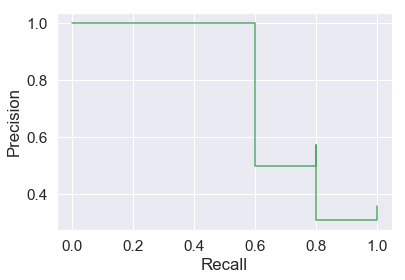

In [24]:
classifier = svm.SVC(kernel='rbf', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')